In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('whitegrid')
from string import ascii_letters

import warnings
warnings.filterwarnings('ignore')

### Multiple lm plot for every dataset.

In [2]:
# Load the example dataset for Anscombe's quartet
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


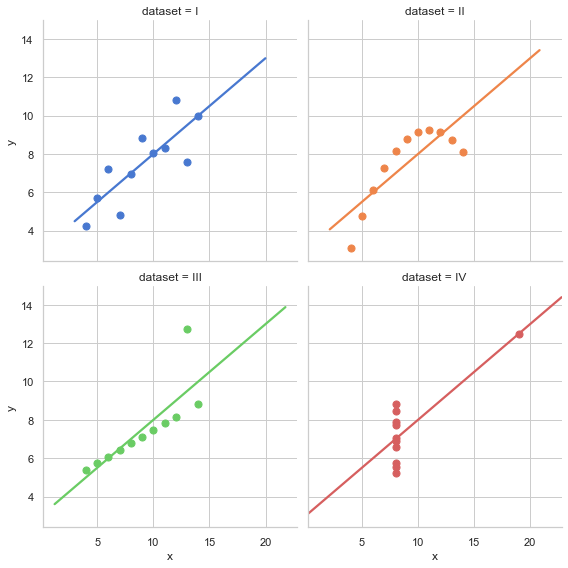

In [3]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data = data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

### Scatterplot with Multiple Semantics

In [4]:
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

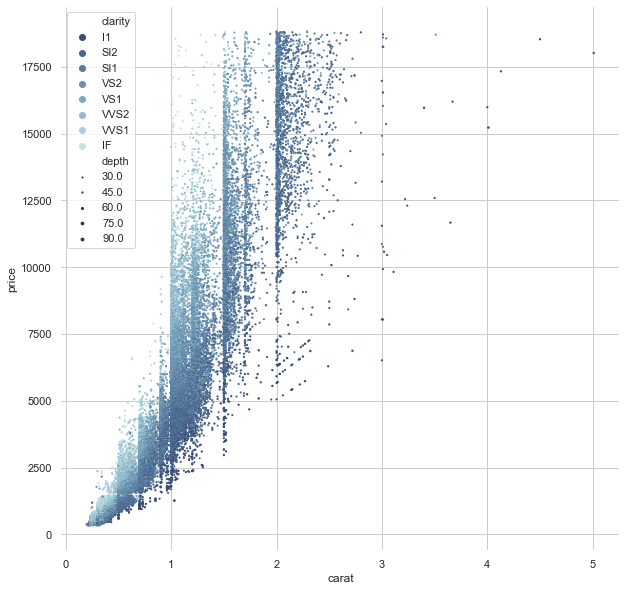

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.scatterplot(x='carat', y='price', hue='clarity', size='depth', palette='ch:r=-.2,d=.3_r',
                hue_order=clarity_ranking, sizes=(1, 8), linewidth=0, data=data, ax=ax)
plt.show()

### Timeseries Plot with Error Bands

In [7]:
# Loan Dataset
data = sns.load_dataset("fmri")
data.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


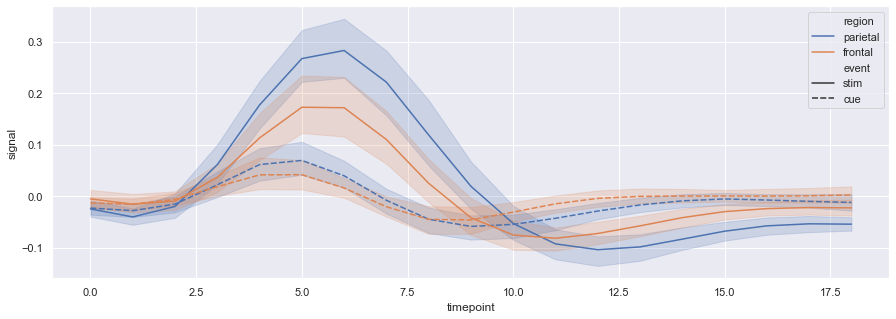

In [8]:
# Plit the lineplot for the different event & region
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.lineplot(x='timepoint', y='signal', hue='region', style='event', data=data)
plt.show()

### Facetting Histograms by Subsets of Data

In [9]:
# Import dataset
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
data.dropna(axis = 0, inplace=True)

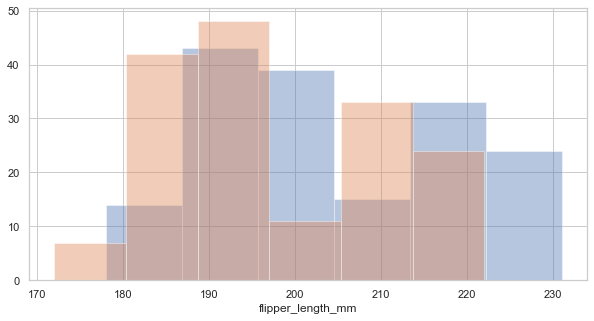

In [11]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.distplot(data[data['sex']=='MALE']['flipper_length_mm'], kde=False)
sns.distplot(data[data['sex']=='FEMALE']['flipper_length_mm'], kde=False)
plt.show()

### Line Plots on Multiple Facets

In [12]:
# Load Dataset
data = sns.load_dataset("dots")
data.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


<Figure size 1080x360 with 0 Axes>

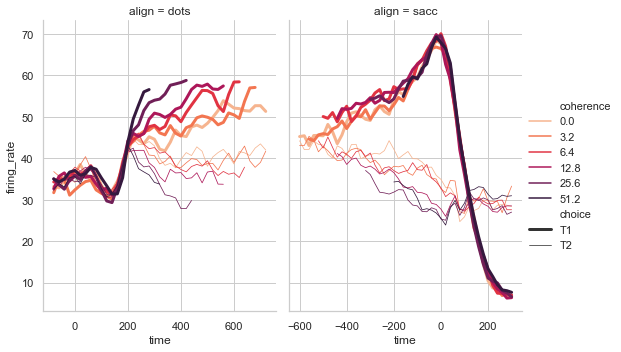

In [13]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
plt.figure(figsize=(15,5))
sns.relplot(data=data, x='time', y='firing_rate', hue='coherence', size='choice', col='align', kind='line', 
            size_order=['T1', 'T2'], palette=palette, height=5, aspect=.75, facet_kws=dict(sharex=False),)
plt.show()

### Grouped Barplots

In [14]:
# Read Dataset
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


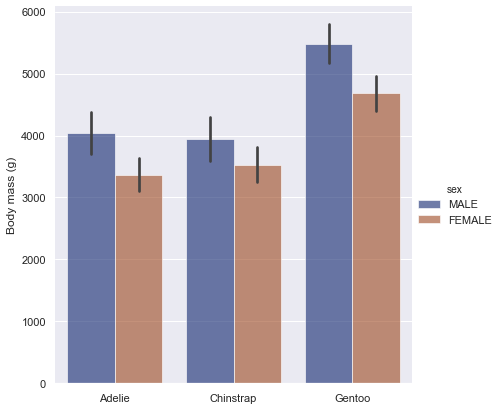

In [15]:
# Draw a nested barplot by species and sex
sns.set_style('darkgrid')
g = sns.catplot(data=data, kind='bar', x='species', y='body_mass_g', hue='sex', ci='sd', palette='dark', 
                alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
plt.show()

### Grouped Boxplots

In [16]:
# Load dataset
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


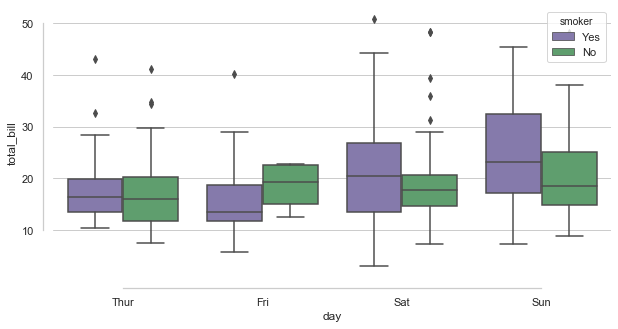

In [17]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.boxplot(x='day', y='total_bill', hue='smoker', palette=['m', 'g'], data=data)
sns.despine(offset=10, trim=True)
plt.show()

### Grouped Violinplots with Split Violins

In [18]:
# Load Dataset
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


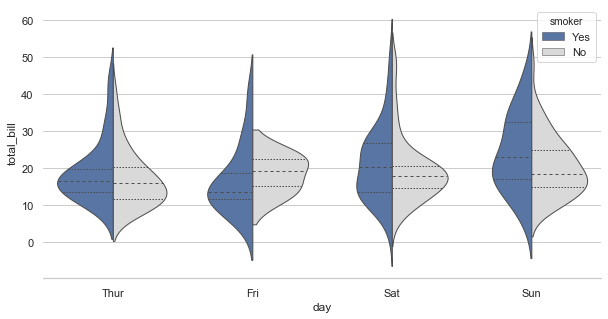

In [19]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data, x='day', y='total_bill', hue='smoker', split=True, inner='quart', linewidth=1,
               palette={'Yes': 'b', 'No': '.85'})
sns.despine(left=True)
plt.show()

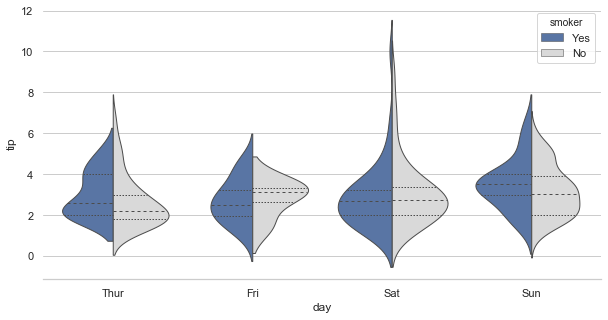

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data, x='day', y='tip', hue='smoker', split=True, inner='quart', linewidth=1,
               palette={'Yes': 'b', 'No': '.85'})
sns.despine(left=True)
plt.show()

### Hexbin Plot with Marginal Distributions

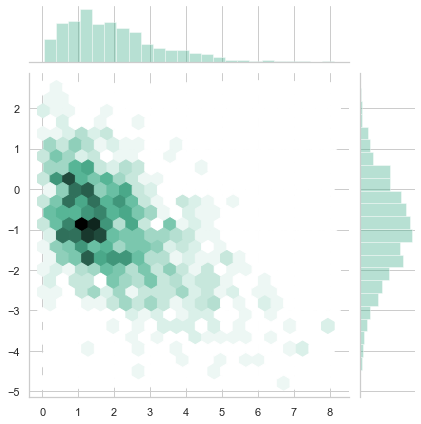

In [21]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
plt.show()

### Stacked Histogram on a Log Scale

In [22]:
# Import dataset
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


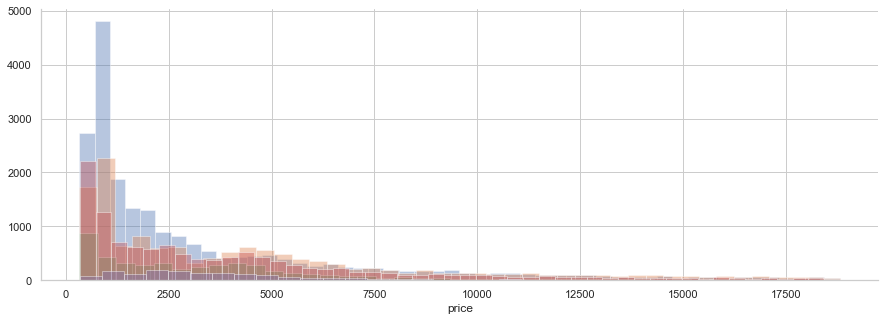

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.distplot(data[data['cut']=='Ideal']['price'], kde=False)
sns.distplot(data[data['cut']=='Premium']['price'], kde=False)
sns.distplot(data[data['cut']=='Good']['price'], kde=False)
sns.distplot(data[data['cut']=='Very Good']['price'], kde=False)
sns.distplot(data[data['cut']=='Fair']['price'], kde=False)
plt.show()

### Horizontal Boxplot with Observations

In [24]:
# Load the dataset
data = sns.load_dataset("planets")
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


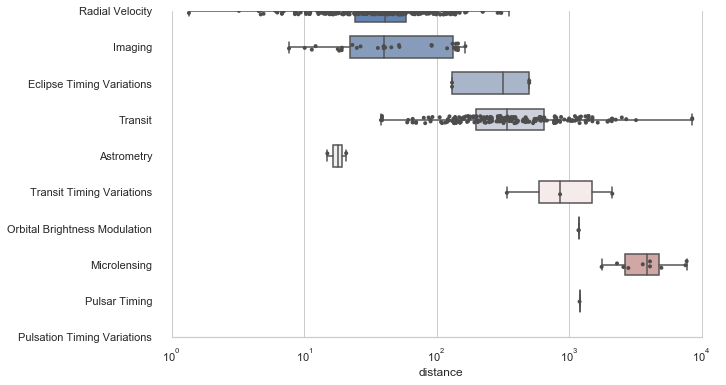

In [25]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')

# Plot the orbital period with horizontal boxes
sns.boxplot(x='distance', y='method', data=data, whis=[0, 100], width=.6, palette='vlag')

# Add in points to show each observation
sns.stripplot(x='distance', y='method', data=data, size=4, color='.3', linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)
plt.show()

### Conditional Means with Observations

In [26]:
# Import data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# Convert data into long format
data = pd.melt(data, "species", var_name="measurement")
data.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


<Figure size 432x288 with 0 Axes>

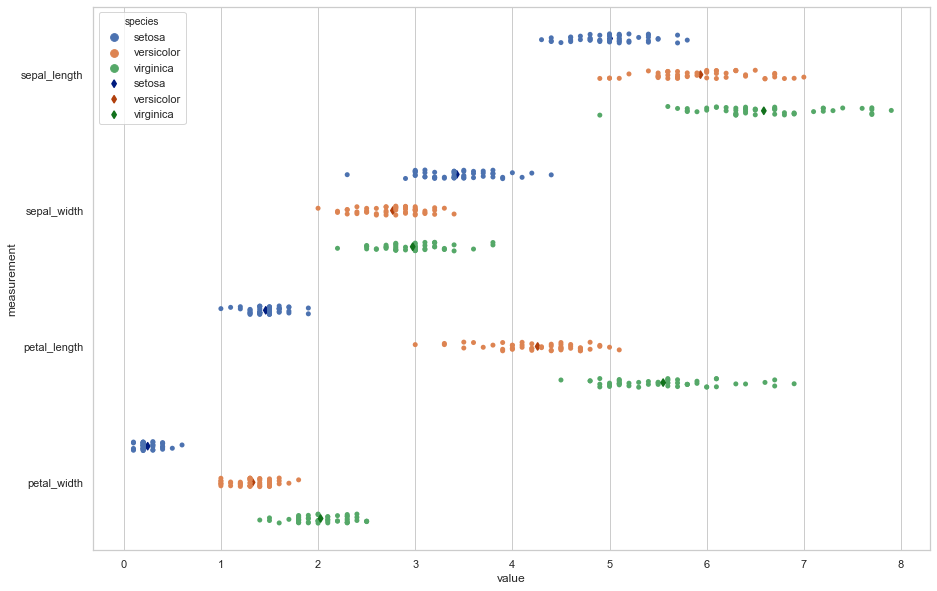

In [28]:
sns.despine(bottom=True, left=True)
plt.figure(figsize=(15,10))
# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species", data=data, dodge=True)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

### Joint Kernel Density Estimate

In [29]:
# Load penguins dataset
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


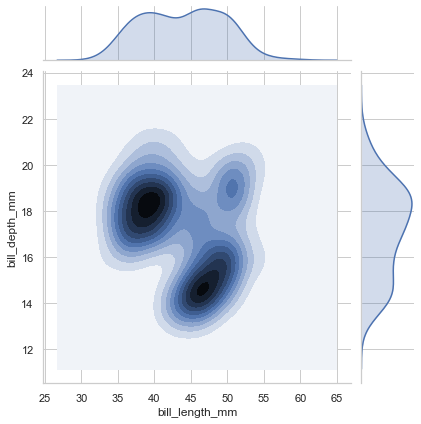

In [30]:
# Show the joint distribution using kernel density estimation
sns.jointplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='kde')
plt.show()

### Overlapping Densities (‘Ridge Plot’)

In [31]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m
df

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


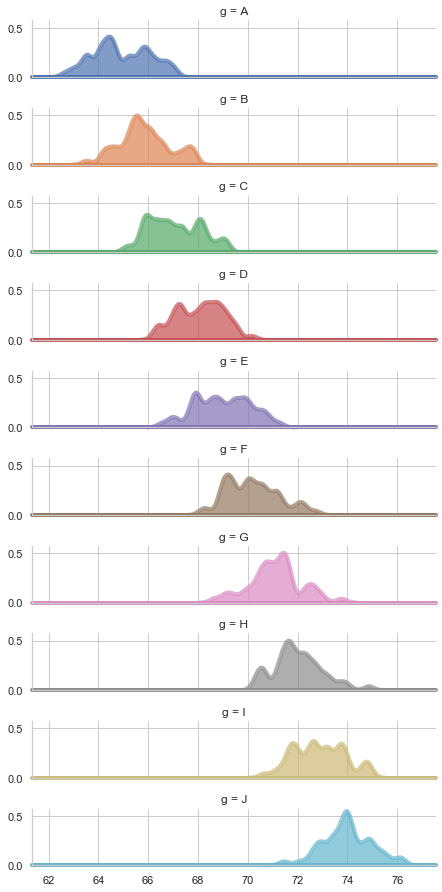

In [32]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(df, row="g", hue="g", aspect=5, height=1.25)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

### Plotting Large Distributions

In [33]:
# Read the dataset
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


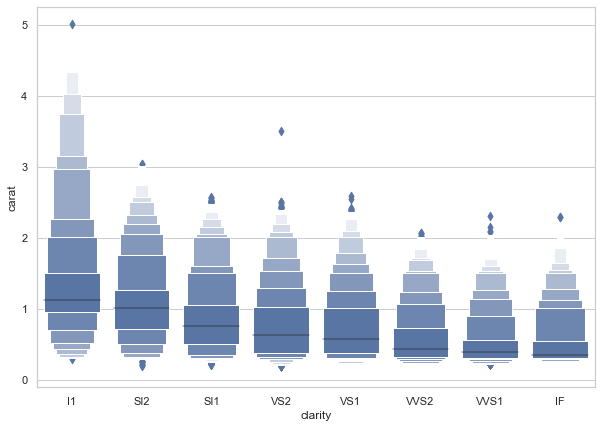

In [34]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='clarity', y='carat', color='b', order=clarity_ranking, scale='linear', data=data)
plt.show()

### Bivariate Plot with Multiple Elements

In [35]:
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

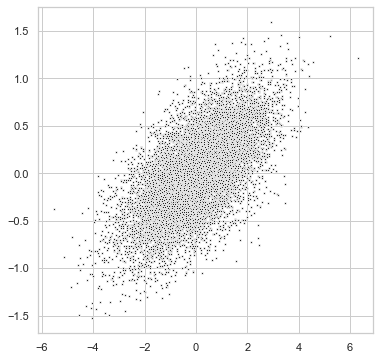

In [36]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
plt.show()

### Faceted Logistic Regression

In [37]:
# Load the Titanic dataset
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

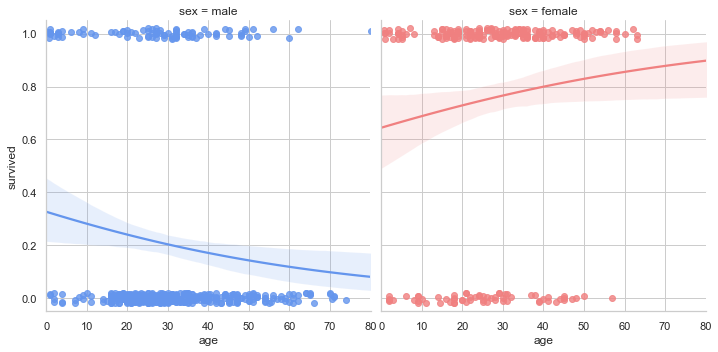

In [39]:
# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=data, palette=pal, y_jitter=.02, 
               logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

### Plotting on a Large Number of Facets

In [40]:
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
data = pd.DataFrame(np.c_[pos.flat, step, walk], columns=["position", "step", "walk"])
data.head()

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0


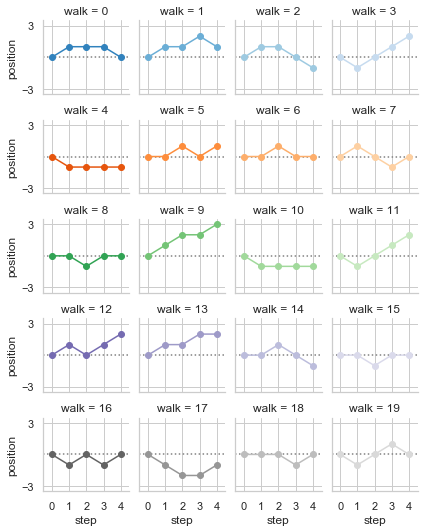

In [41]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(data, col="walk", hue="walk", palette="tab20c", col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

### Plotting a Diagonal Correlation Matrix

In [42]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))
d.head().T

,0,1,2,3,4
A,-0.318854,-1.230374,-0.023842,-0.292821,-0.587376
B,-1.602981,0.205848,-0.363738,0.856582,1.751572
C,-1.535218,0.821371,-0.482943,0.933473,0.308274
D,-0.570401,-0.493780,0.739577,-0.421045,-0.894283
E,-0.216728,-1.408794,0.611252,1.590430,-0.769156
F,0.254874,-1.216324,0.491802,-1.063801,0.869197
G,-0.149450,1.734299,1.792924,2.104884,0.371381
H,2.010783,-0.206790,-0.683737,-1.090494,-0.628362
I,-0.096784,-0.733189,1.054113,1.484521,-0.922477
J,0.422202,0.774163,-0.615562,-1.089229,-0.903391


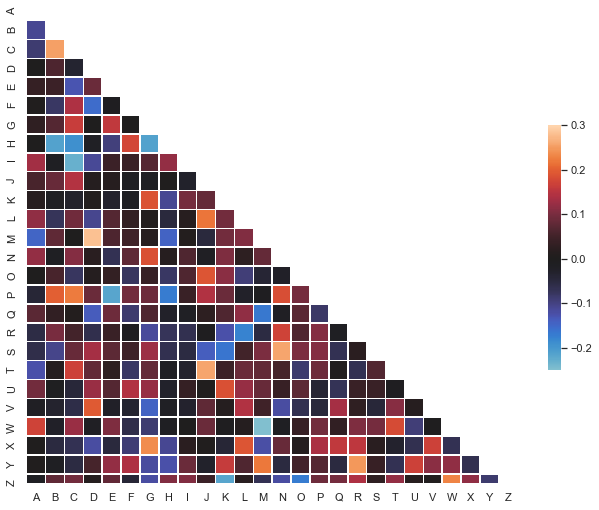

In [43]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Scatterplot with Marginal Ticks

In [44]:
# Load Dataset
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


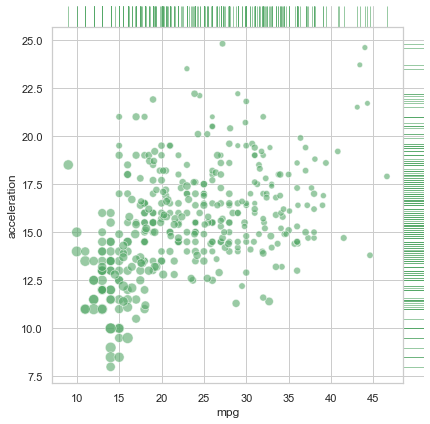

In [45]:
g = sns.JointGrid(data=data, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=data["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)
plt.show()

### Multiple Linear Regression

In [46]:
# import data
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


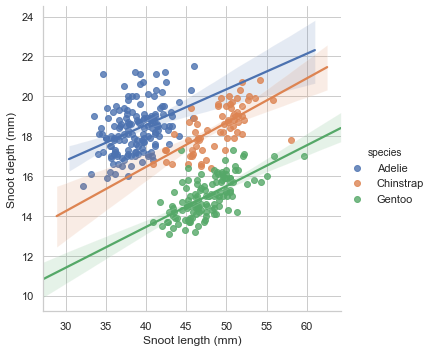

In [47]:
# Plot sepal width as a function of sepal_length across days
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels('Snoot length (mm)', 'Snoot depth (mm)')
plt.show()

### Paired density and scatterplot matrix

In [48]:
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


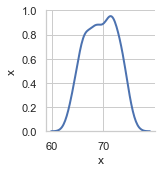

In [49]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.show()

### Paired Categorical Plots

In [50]:
# Loan dataset
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


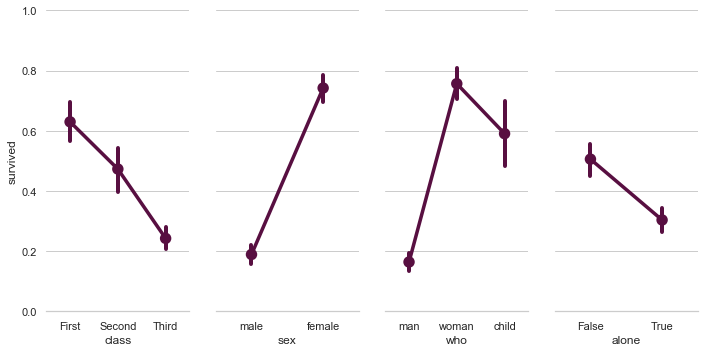

In [51]:
# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(data, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)
plt.show()

### Color Palette Choices

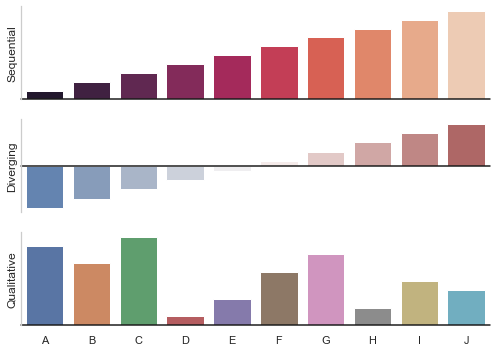

In [52]:
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### Horizontal Bar Plots

In [53]:
# Load the car crash dataset
data = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


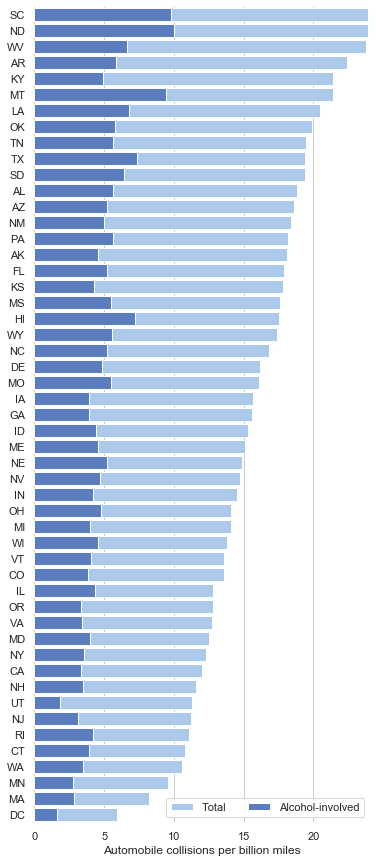

In [54]:
f, ax = plt.subplots(figsize=(6, 15))
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=data,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=data,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
plt.show()

### Plotting a Three-Way ANOVA

In [55]:
# Load the exercise dataset
data = sns.load_dataset("exercise")
data.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


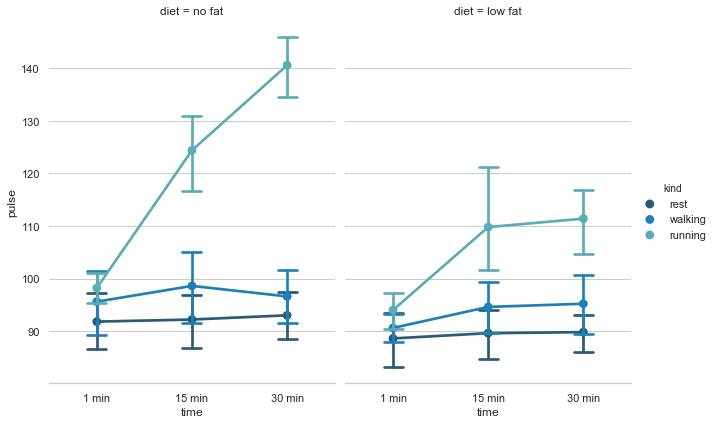

In [56]:
g = sns.catplot(x='time', y='pulse', hue='kind', col='diet', capsize=.2, palette='YlGnBu_d', height=6, aspect=.75,
                kind='point', data=data)
g.despine(left=True)
plt.show()

### FacetGrid with Custom Projection

In [57]:
# Generate an example radial datast
r = np.linspace(0, 10, num=100)
data = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
data = pd.melt(data, id_vars=['r'], var_name='speed', value_name='theta')
data.head()

,r,speed,theta
0,0.00000,slow,0.00000
1,0.10101,slow,0.10101
2,0.20202,slow,0.20202
3,0.30303,slow,0.30303
4,0.40404,slow,0.40404


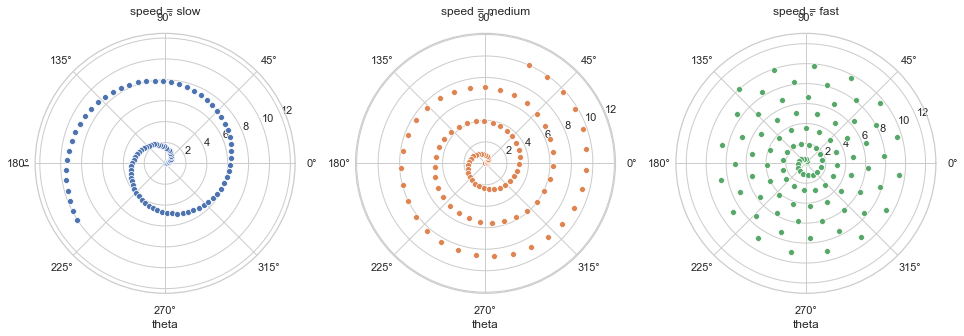

In [58]:
# Set up a grid of axes with a polar projection
g = sns.FacetGrid(data, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")
plt.show()

### Linear Regression with Marginal Distributions

In [59]:
# Load dataset
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


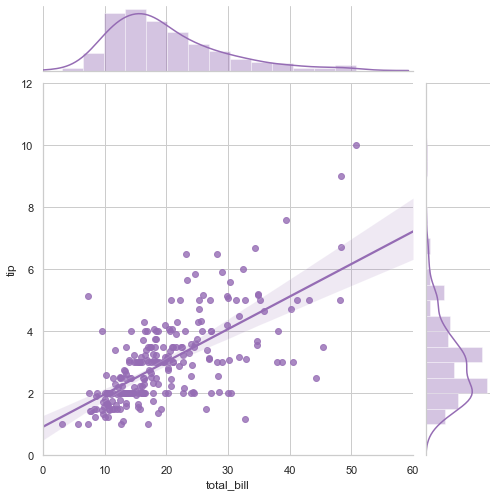

In [60]:
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg', truncate=False, xlim=(0, 60), ylim=(0, 12), 
              color='m', height=7)
plt.show()

### Plotting Model Residuals

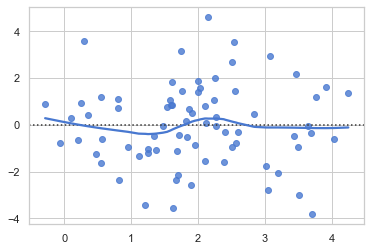

In [61]:
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color='b')
plt.show()

### Scatterplot with Varying Point Sizes and Hues

In [62]:
data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


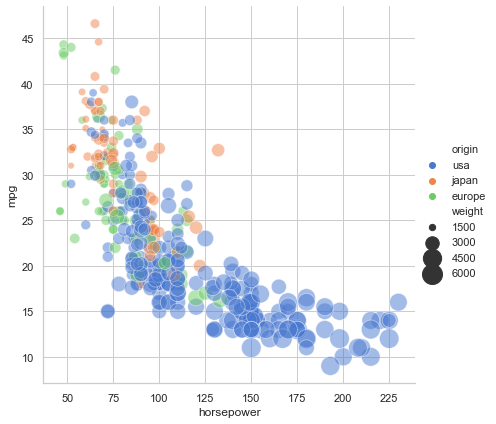

In [63]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='horsepower', y='mpg', hue='origin', size='weight', sizes=(40, 400), alpha=.5, palette='muted',
            height=6, data=data)
plt.show()

### Scatterplot with Categorical Variables

In [64]:
# Load the dataset
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


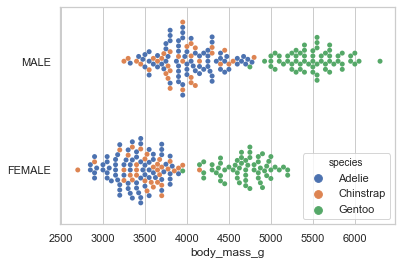

In [65]:
ax = sns.swarmplot(data=data, x='body_mass_g', y='sex', hue='species')
ax.set(ylabel='')
plt.show()

### Scatterplot Matrix

In [66]:
# Read database
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


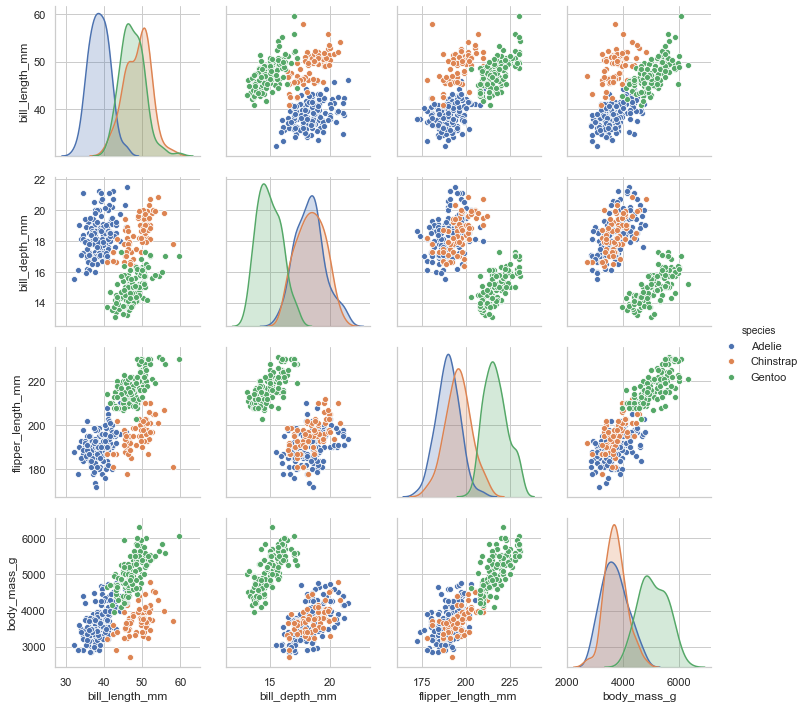

In [67]:
sns.pairplot(data, hue='species')
plt.show()

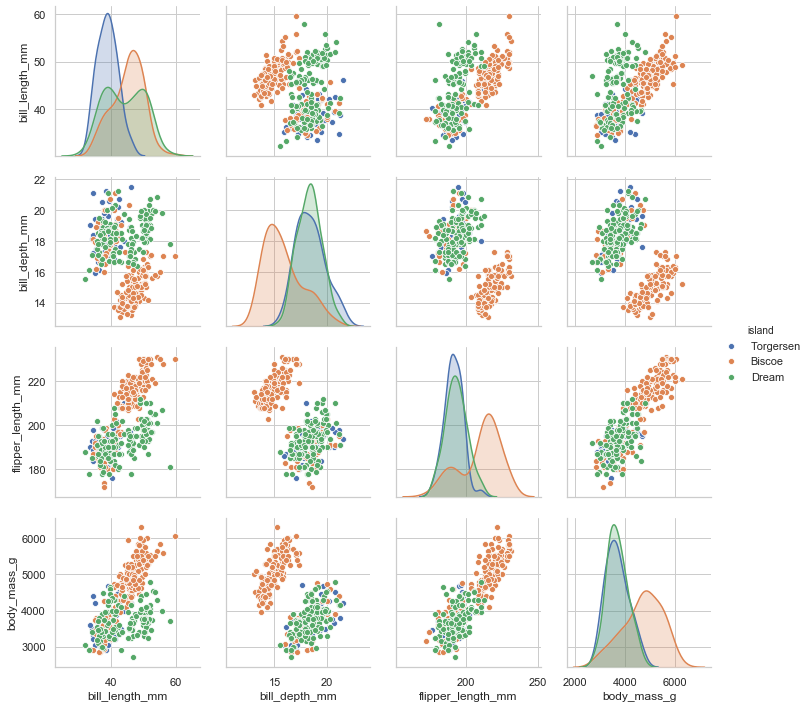

In [68]:
sns.pairplot(data, hue='island')
plt.show()

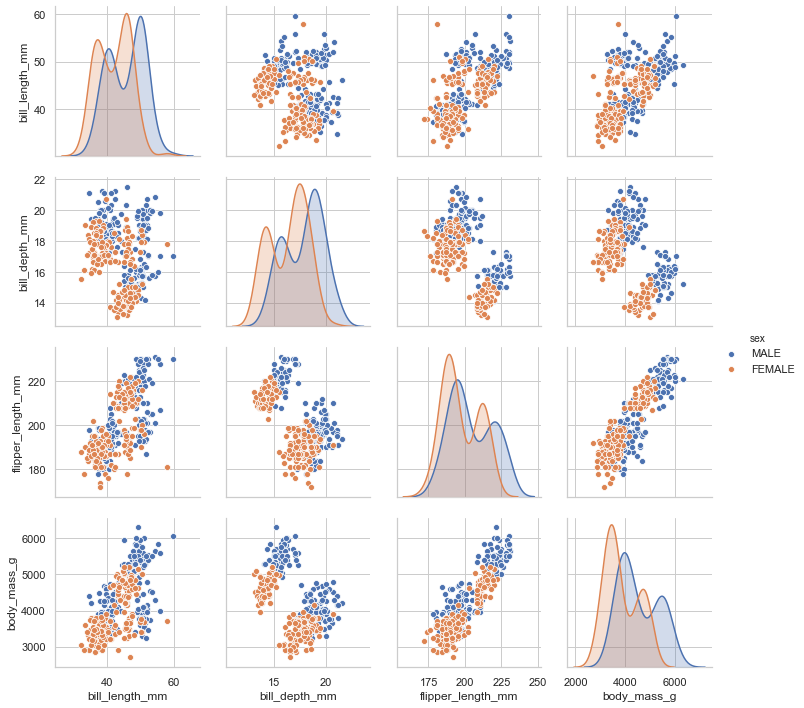

In [69]:
sns.pairplot(data, hue='sex')
plt.show()

### Scatterplot with Continuous Hues and Sizes

In [70]:
# Load the example planets dataset
data = sns.load_dataset('planets')
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


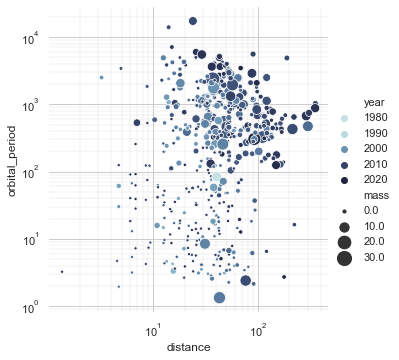

In [71]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=data, x='distance', y='orbital_period', hue='year', size='mass', palette=cmap, sizes=(10, 200),)
g.set(xscale='log', yscale='log')
g.ax.xaxis.grid(True, 'minor', linewidth=.25)
g.ax.yaxis.grid(True, 'minor', linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

### Violinplots with Observations

In [72]:
# Create a random dataset across several variables
rs = np.random.default_rng(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

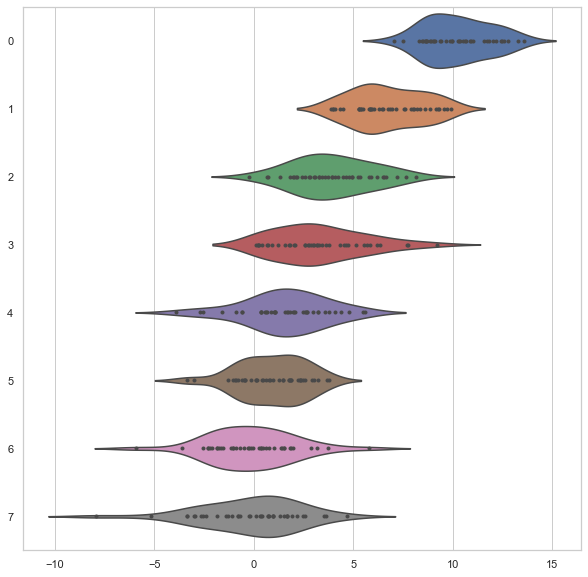

In [73]:
# Show each distribution with both violins and points
plt.figure(figsize=(10, 10))
sns.violinplot(data=d, inner="points", orient="h")
plt.show()

### Smooth Kernel Density with Marginal Histograms

In [74]:
# Loan the database
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


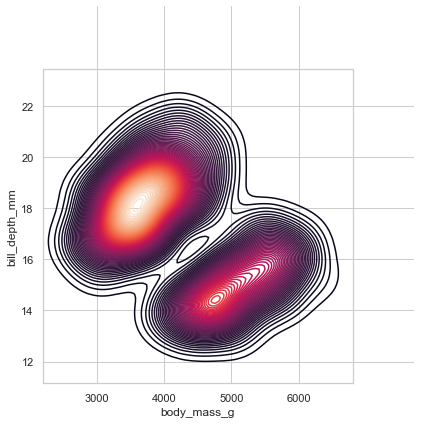

In [76]:
g = sns.JointGrid(data=data, x='body_mass_g', y='bill_depth_mm', space=0)
g.plot_joint(sns.kdeplot, fill=True, clip=((2200, 6800), (10, 25)), thresh=0, levels=100, cmap='rocket')
plt.show()

### Annotated Heatmaps

In [79]:
data = sns.load_dataset('flights')
data_pivot = data.pivot("month", "year", "passengers")
data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


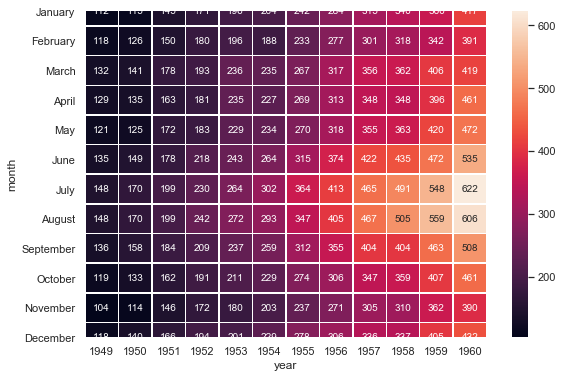

In [80]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data_pivot, annot=True, fmt='d', linewidths=.5, ax=ax)
plt.show()

### Lineplot from a Wide-Form Dataset

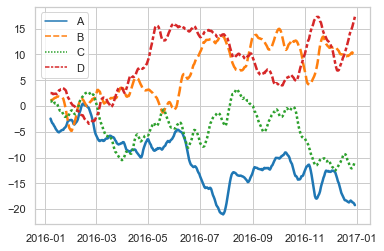

In [81]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.show()

### Violinplot from a Wide-Form Dataset

In [82]:
# Read the Dataset
data = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)
data.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

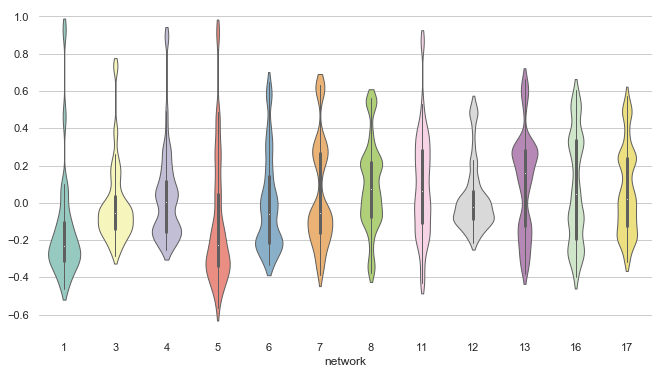

In [83]:
# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (data.columns.get_level_values("network").astype(int).isin(used_networks))
data = data.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = data.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

### End